### Preprocessing

In [1]:
# import relevant statistical packages
import numpy as np
import pandas as pd

# import data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# set plot figure size to 15 x 12
plt.rcParams["figure.figsize"] = (15, 12)

In [2]:
# import custom packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import (
    LinearRegression,
    LassoCV,
    RidgeCV,
)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score as r2

In [3]:
# pandas version
pd.__version__

'1.5.3'

In [4]:
# import data
# url = "/Users/arpanganguli/Documents/Professional/Finance/ISLR/Datasets/College.csv"
file_name = '../../Data/College.csv'
College = pd.read_csv(file_name, index_col = 'Unnamed: 0')
College

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


#### Dataset dictionary
#### Source: https://rdrr.io/cran/ISLR/man/College.html

In [5]:
College.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
# verify duplicate values
College.duplicated().sum()

0

In [11]:
# verify missing values
College.isnull().sum().sum()

0

In [8]:
# plt.xkcd()
# plt.figure(figsize = (25, 10))
# sns.heatmap(College.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [13]:
# descriptive statistics
College.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


array([[<Axes: title={'center': 'Apps'}>,
        <Axes: title={'center': 'Accept'}>,
        <Axes: title={'center': 'Enroll'}>,
        <Axes: title={'center': 'Top10perc'}>],
       [<Axes: title={'center': 'Top25perc'}>,
        <Axes: title={'center': 'F.Undergrad'}>,
        <Axes: title={'center': 'P.Undergrad'}>,
        <Axes: title={'center': 'Outstate'}>],
       [<Axes: title={'center': 'Room.Board'}>,
        <Axes: title={'center': 'Books'}>,
        <Axes: title={'center': 'Personal'}>,
        <Axes: title={'center': 'PhD'}>],
       [<Axes: title={'center': 'Terminal'}>,
        <Axes: title={'center': 'S.F.Ratio'}>,
        <Axes: title={'center': 'perc.alumni'}>,
        <Axes: title={'center': 'Expend'}>],
       [<Axes: title={'center': 'Grad.Rate'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

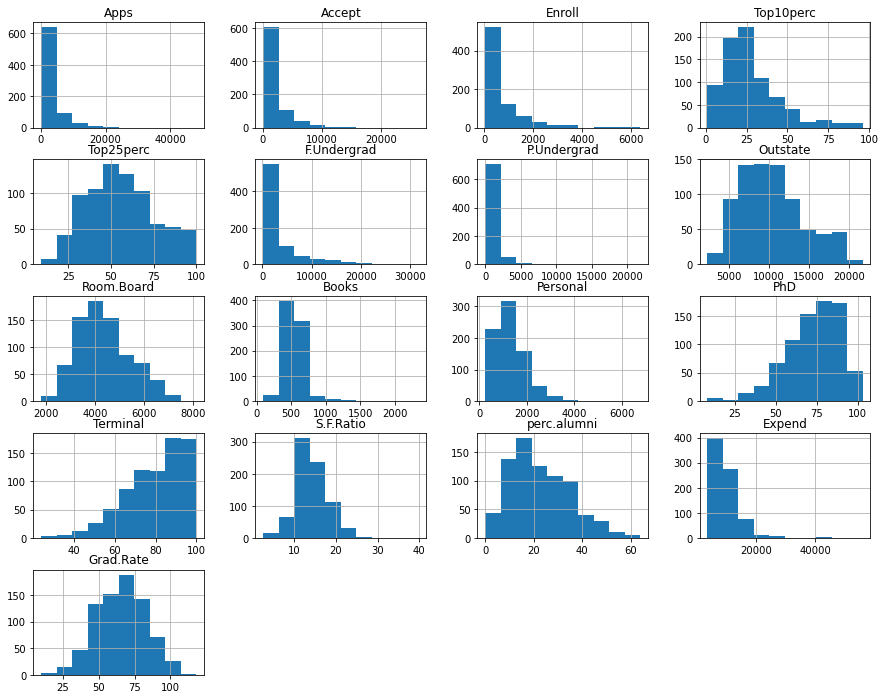

In [14]:
# histograms
College.hist()

<Axes: >

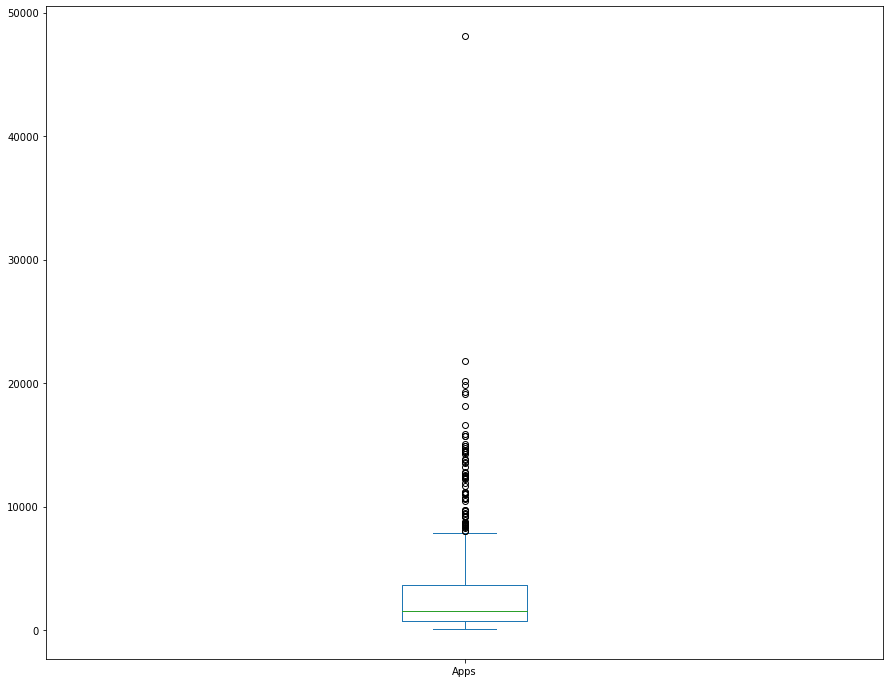

In [15]:
# 'Apps' boxplot
College['Apps'].plot(kind='box')

**Lots of outliers in `Apps`!**

<Axes: >

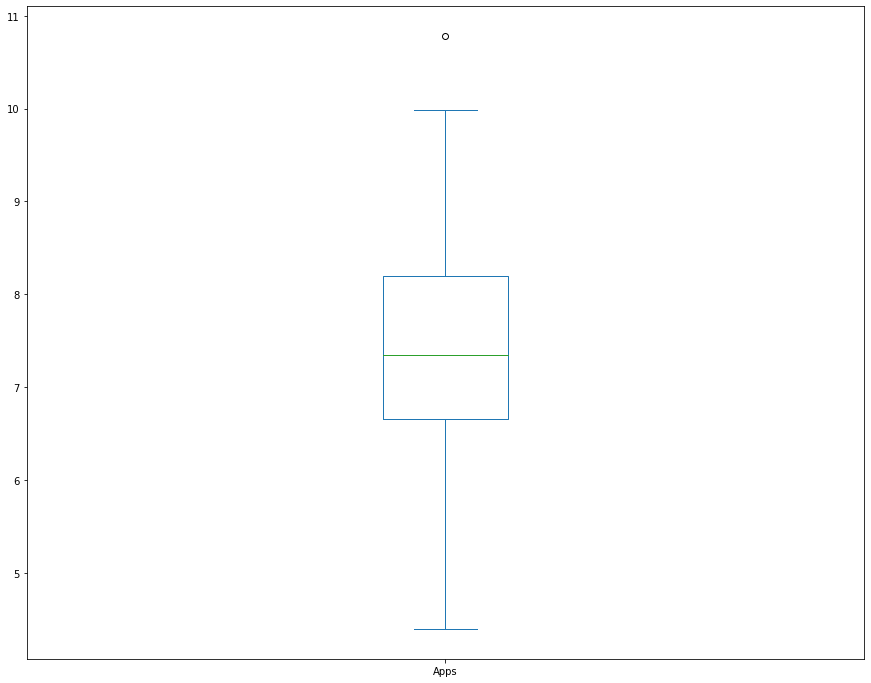

In [16]:
# boxplot log transform 'Apps'
np.log(College['Apps']).plot(kind = 'box')

<Axes: ylabel='Frequency'>

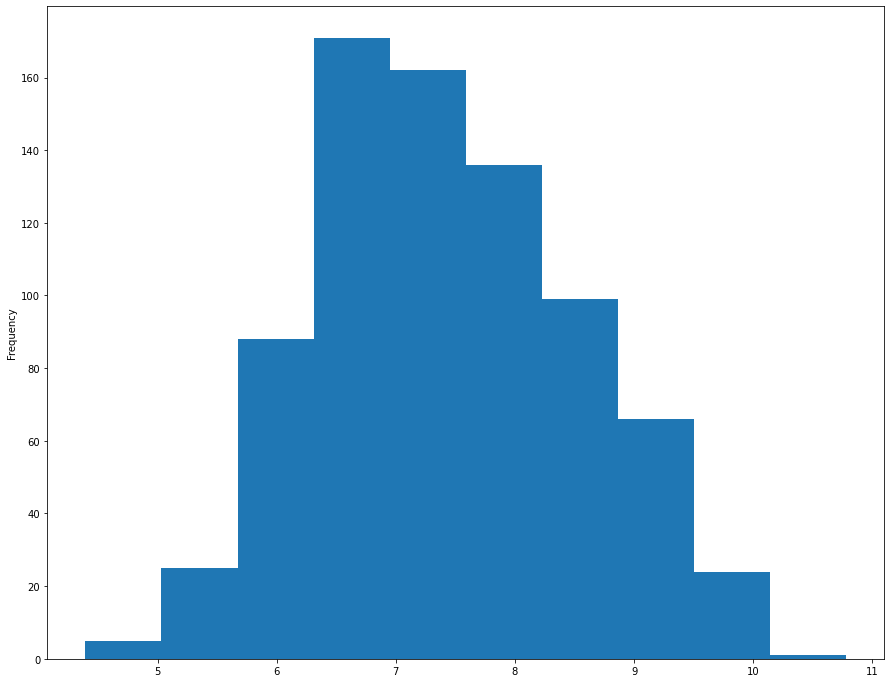

In [13]:
# histogram log transform 'Apps'
np.log(College['Apps']).plot(kind = 'hist')

In [14]:
# create `log_Apps`
# College['log_Apps'] = np.log(College['Apps'])

In [18]:
# count 'Private'
College['Private'].value_counts(normalize=True)

Yes    0.727156
No     0.272844
Name: Private, dtype: float64

In [19]:
# convert "Private" to binary
College['Private'] = (College['Private'] =='Yes').astype(int) 

In [20]:
College.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<Axes: >

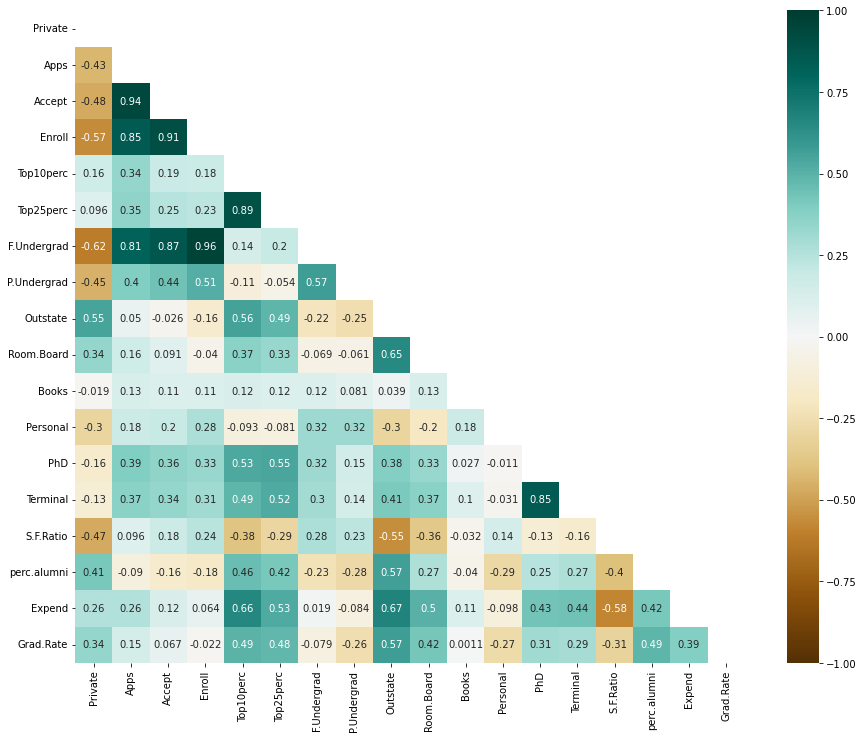

In [21]:
# correlation heatmap
sns.heatmap(College.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'BrBG', mask = np.triu(College.corr()))

Because of the presence of multiple predictors (high dimensionality), there are various features that exhibit high correlation (i.e. multicolinearity is present).

### 9(a) Splitting data set into a training set and a test set

In [22]:
from sklearn.model_selection import train_test_split
X = College.drop(columns=['Apps'])
y = College['Apps']

In [23]:
# stratified binning for continuout target
# Source: https://stats.stackexchange.com/questions/575378/stratification-of-the-continuous-y-target-variable-in-regression-setting

# define number of bins
num_observations = College.shape[0]
bins = np.linspace(0, num_observations, 8)
bins

array([  0., 111., 222., 333., 444., 555., 666., 777.])

In [24]:
# save y values broken down by bins created
y_binned = np.digitize(y, bins)

In [25]:
# split dataset into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y_binned, random_state = 2020)

In [26]:
# print traing and test shapes
print(X_train.shape)
print(X_test.shape)

(543, 17)
(234, 17)


<Axes: title={'center': 'Test'}, ylabel='Density'>

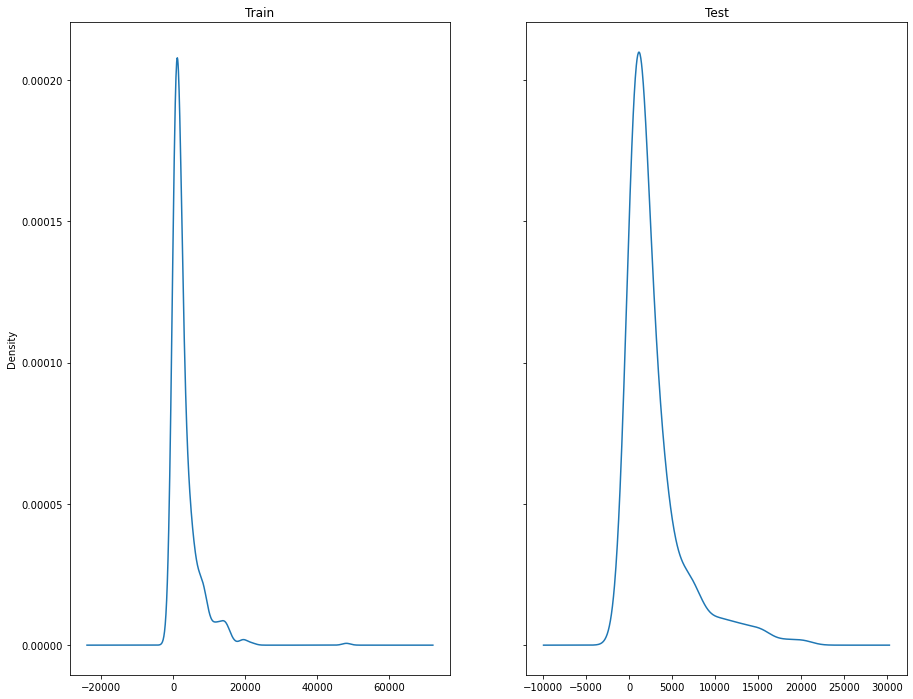

In [27]:
# kernel density plots for y_train and y_test
fig, (ax_1, ax_2) = plt.subplots(ncols = 2, sharey = True)
y_train.plot(kind = 'kde', ax = ax_1, title = 'Train')
y_test.plot(kind = 'kde', ax = ax_2, title = 'Test')

### 9(b) Fitting a linear model using least squares

### Source: https://towardsdatascience.com/build-better-regression-models-with-lasso-271ce0f22bd

**IMPORTANT: ** In `scikit-learn`, the preprocessing function to convert the predictors value to mean = 0 and standard deviation = 1 is **StandardScaler()**. Do not confuse with R version. The R equivalent is *center() and scale()* in base R or *step_normalize()* in `tidymodels`.

#### Source: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [28]:
# make pipeline with StandardScaler() and LinearRegression()
linear_regression = make_pipeline(StandardScaler(), LinearRegression())
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [29]:
# MSE
ols_mse = mean_squared_error(y_test, linear_regression.predict(X_test)).round(4)
ols_mse

966414.9739

In [30]:
# linear regression model coefficient estimates
feature_names = X_train.columns
linear_regression_coef = linear_regression[-1].coef_
list(zip(feature_names, linear_regression_coef))

[('Private', -182.52671854622622),
 ('Accept', 4125.457692439093),
 ('Enroll', -1479.337695518127),
 ('Top10perc', 1145.6013713516722),
 ('Top25perc', -497.97209165250825),
 ('F.Undergrad', 823.8178263151842),
 ('P.Undergrad', 48.97012010118469),
 ('Outstate', -474.1072022407412),
 ('Room.Board', 204.69988553507213),
 ('Books', 52.09289284212784),
 ('Personal', 9.399719590297705),
 ('PhD', -127.18566695714532),
 ('Terminal', -57.11383640007111),
 ('S.F.Ratio', 46.715186692822),
 ('perc.alumni', 62.96041402205434),
 ('Expend', 452.50922292324685),
 ('Grad.Rate', 241.9229754462877)]

### 9(c) Ridge regression model

In [31]:
ridge_cv = make_pipeline(StandardScaler(), RidgeCV())
ridge_cv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridgecv', RidgeCV())])

In [32]:
# MSE
ridge_mse = mean_squared_error(y_test, ridge_cv.predict(X_test)).round(4)
ridge_mse

962339.9226

In [33]:
# tuned alpha
ridge_cv[-1].alpha_

0.1

In [34]:
# Ridge regression coefficient estimates
ridge_cv_coef = ridge_cv[-1].coef_
list(zip(feature_names, ridge_cv_coef))

[('Private', -183.00687972247584),
 ('Accept', 4118.422220423554),
 ('Enroll', -1462.9553304921606),
 ('Top10perc', 1142.4688069455117),
 ('Top25perc', -495.28273364276924),
 ('F.Undergrad', 813.396209171706),
 ('P.Undergrad', 49.26238086359424),
 ('Outstate', -472.856724211906),
 ('Room.Board', 205.10764623924788),
 ('Books', 52.18314561823563),
 ('Personal', 9.355486534755675),
 ('PhD', -127.00223472242071),
 ('Terminal', -57.303361848137286),
 ('S.F.Ratio', 46.736128875962095),
 ('perc.alumni', 62.12206494714501),
 ('Expend', 452.54952828878254),
 ('Grad.Rate', 241.6585487306793)]

**Therefore, the MSE through ridge regression for the best value of $\lambda$ is slightly lower than that of least squares regression.**

### 9.d. Lasso regression model

In [35]:
lasso_cv = make_pipeline(StandardScaler(), LassoCV())
lasso_cv.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lassocv', LassoCV())])

In [36]:
# MSE
lasso_mse = mean_squared_error(y_test, lasso_cv.predict(X_test)).round(4)
lasso_mse

902138.2313

In [37]:
# tuned alpha
lasso_cv[-1].alpha_

3.768452574619567

In [38]:
# Lasso regression coefficient estimates
lasso_cv_coef = lasso_cv[-1].coef_
list(zip(feature_names, lasso_cv_coef))

[('Private', -181.20794801830604),
 ('Accept', 4063.175161107198),
 ('Enroll', -1249.7131039574697),
 ('Top10perc', 1090.1904329018955),
 ('Top25perc', -444.23557982627335),
 ('F.Undergrad', 648.9571201865552),
 ('P.Undergrad', 49.924564675724945),
 ('Outstate', -449.7875108973554),
 ('Room.Board', 198.71827472237194),
 ('Books', 49.553099762196645),
 ('Personal', 6.760306317456092),
 ('PhD', -121.82195513539524),
 ('Terminal', -53.43992724030482),
 ('S.F.Ratio', 38.18611287745666),
 ('perc.alumni', 42.91489611896005),
 ('Expend', 443.46639943610063),
 ('Grad.Rate', 228.08327849434494)]

#### Coefficient plot

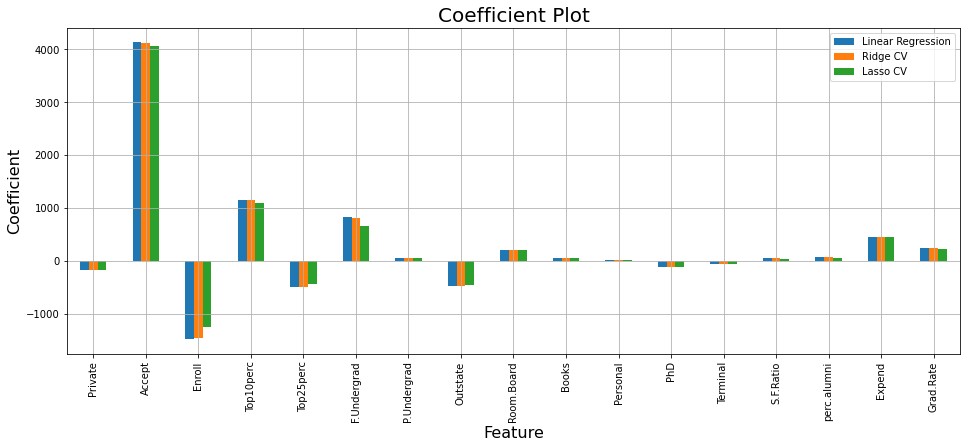

In [39]:
def plot_save_coefficient():

    pd.DataFrame(
        {
            "Linear Regression": linear_regression_coef,
            "Ridge CV": ridge_cv_coef,
            "Lasso CV": lasso_cv_coef,
        },
        index=feature_names,
    ).plot.bar(
        figsize=(16, 6),
        grid=True,
    )
    plt.title("Coefficient Plot", fontsize=20)
    plt.xlabel("Feature", fontsize=16)
    plt.ylabel("Coefficient", fontsize=16)

    # plt.savefig("../static/coefficient.png", format="png")
    plt.show()


plot_save_coefficient()

In [40]:
# print MSE for each model
print('OLS   = ', ols_mse)
print('Ridge = ', ridge_mse)
print('Lasso = ', lasso_mse)

OLS   =  966414.9739
Ridge =  962339.9226
Lasso =  902138.2313


**Therefore, the MSE through lasso regression for the best value of $\lambda$ is lower than the least squares regression and ridge regression.**

### 9(e) Principal Components Regression (PCR)

In [41]:
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold as KF
from sklearn.decomposition import PCA

In [42]:
pca = PCA()
X_scaled = pca.fit_transform(scale(X))
pd.DataFrame(pca.components_.T).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.202812,-0.319559,0.149372,0.207191,-0.031502,-0.036004,0.168956,0.045178,0.100507,0.255659,-0.679925,0.243330,0.400442,0.022856,-0.005083,-0.018185,0.020710
1,0.013150,0.419033,-0.027107,0.362324,-0.112086,0.002294,-0.024322,-0.078009,-0.205999,0.111519,-0.139350,0.012237,-0.084645,-0.044591,0.668209,0.340916,0.163274
2,-0.028705,0.442952,-0.028317,0.250415,-0.175489,-0.053479,-0.038284,0.022376,-0.158714,0.107028,-0.099764,-0.011528,0.084219,-0.005395,-0.289985,-0.091788,-0.746638
3,0.344736,0.130412,0.005602,-0.221019,-0.331967,-0.059989,-0.142619,-0.155381,0.335004,0.056230,0.022198,-0.015130,0.044255,-0.100738,-0.298952,0.661023,0.049435
4,0.318675,0.161423,-0.057655,-0.252482,-0.344360,0.020636,-0.083522,-0.136922,0.404634,0.040709,-0.137801,-0.232051,-0.100871,0.137365,0.324859,-0.534082,-0.050407


In [43]:
# selecting M, the number of components that give the lowest cross-validation error
from sklearn.model_selection import cross_val_score

n = len(X)
kf10 = KF(n_splits=10, shuffle=True, random_state=42)

lm = LinearRegression()
MSEdf= pd.DataFrame()

# calculating MSE with only the intercept through cross-validation
mse = -1 * cross_val_score(lm, np.ones((n,1)), y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()    
MSEdf = MSEdf.append([round(mse, 9)])

# calculating MSE for the 17 components through cross-validation
for i in np.arange(1, 18):
    mse = -1 * cross_val_score(lm, X_scaled[:,:i], y.ravel(), cv=kf10, scoring='neg_mean_squared_error').mean()
    MSEdf = MSEdf.append([round(mse, 9)])
    
MSEdf.reset_index(drop=True, inplace=True)
MSEdf.columns = ['MSE']
MSEdf

,MSE
0,1.501065e+07
1,1.470316e+07
2,4.168015e+06
3,4.181085e+06
4,2.853096e+06
5,2.542135e+06
6,2.549381e+06
7,2.516724e+06
8,2.367538e+06
9,2.280221e+06


Text(0, 0.5, 'MSE')

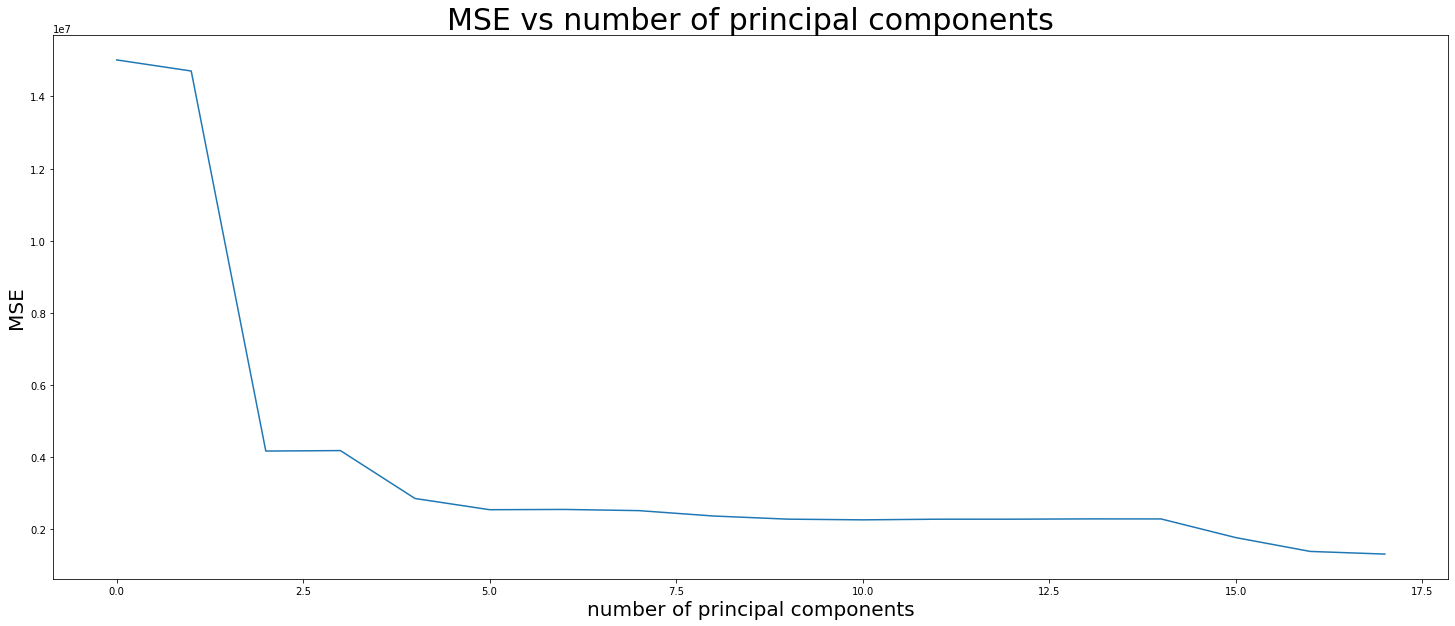

In [41]:
# plotting MSE for each component
# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdf)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0, 0.5, 'explained variance ratio')

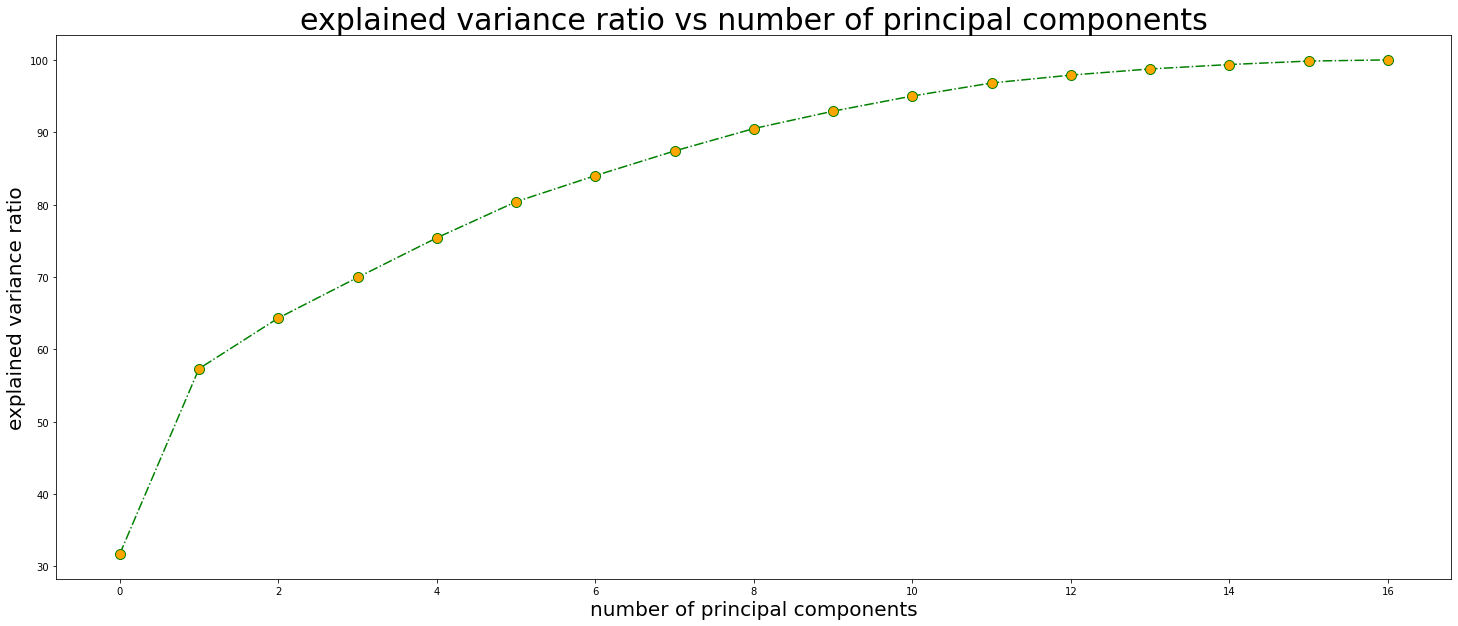

In [44]:
# plotting explained variance ratio
exp_var_ratio = pd.DataFrame(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(exp_var_ratio, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

*This suggests that I will get the lowest MSE at M=17, which is the same as performing a regular least squares regression! So, I will now perform PCR on the training set and validate the model using the test set.*

In [45]:
# performing PCR on train and test data sets
pca_train = PCA()
X_scaled_train = pca_train.fit_transform(scale(X_train))
n = len(X_scaled_train)

lmtrain = LinearRegression()

kf10train = KF(n_splits=10, shuffle=True, random_state=42)
MSEdftrain= pd.DataFrame()

# calculating MSE with only the intercept through cross-validation
msetrain = -1 * cross_val_score(lmtrain, np.ones((n,1)), y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()    
MSEdftrain = MSEdftrain.append([msetrain])

# calculating MSE for the 17 components through cross-validation
for i in np.arange(1, 18):
    msetrain = -1 * cross_val_score(lmtrain, X_scaled_train[:,:i], y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()
    MSEdftrain = MSEdftrain.append([msetrain])
    
MSEdftrain.reset_index(drop=True, inplace=True)
MSEdftrain.columns = ['MSE']
MSEdftrain

,MSE
0,1.627309e+07
1,1.548386e+07
2,4.822062e+06
3,4.714787e+06
4,3.266219e+06
5,3.288687e+06
6,3.209235e+06
7,3.022021e+06
8,2.969864e+06
9,2.900183e+06


Text(0, 0.5, 'MSE')

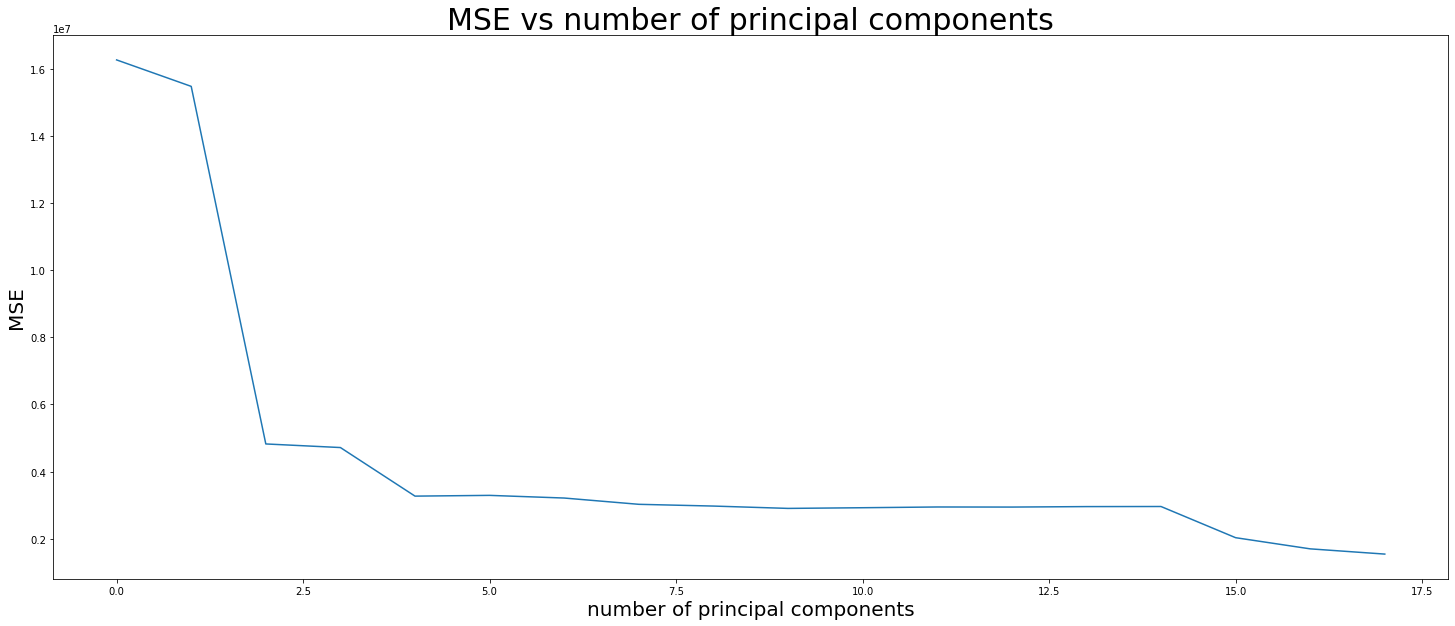

In [46]:
# plotting MSE for each component
# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdftrain)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

Text(0, 0.5, 'explained variance ratio')

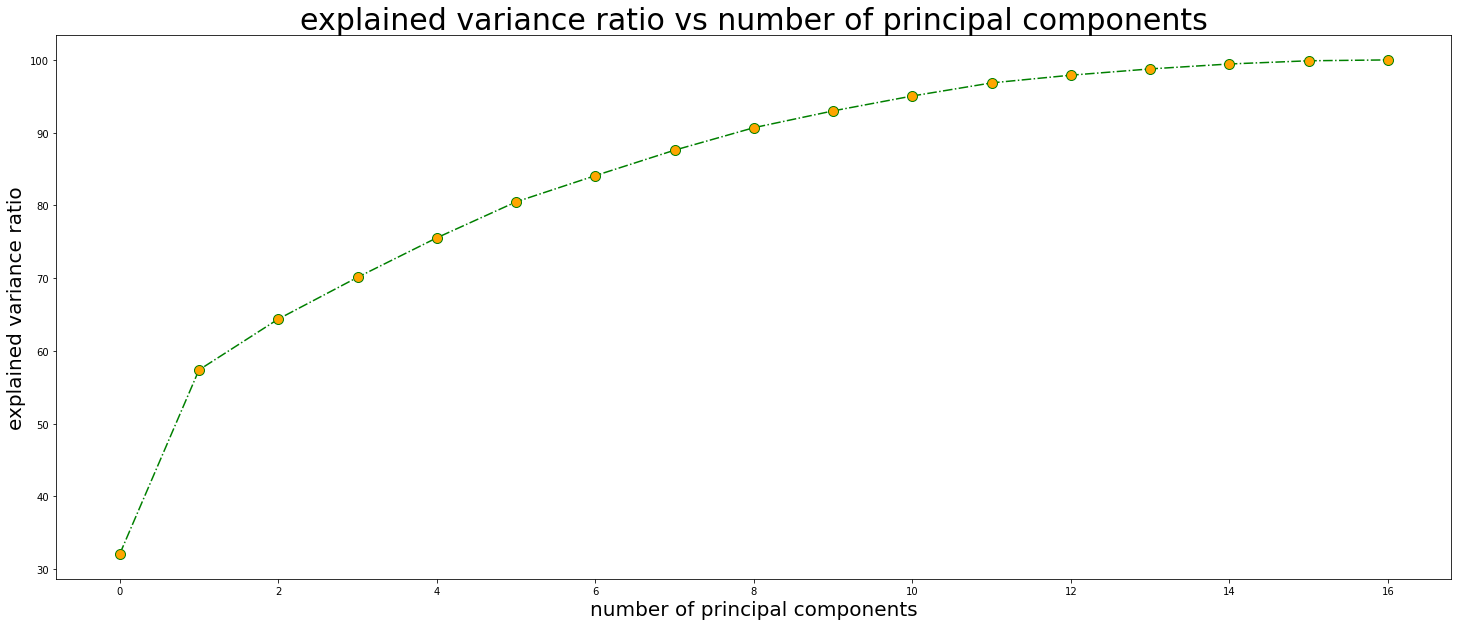

In [47]:
# plotting explained variance ratio
exp_var_ratio_scaled = pd.DataFrame(np.cumsum(np.round(pca_train.explained_variance_ratio_, decimals=4)*100))

# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(exp_var_ratio_scaled, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

*While the MSEs themselves are somewhat reduced due to scaling, the results still suggest that I will get the best test MSE at M=17.*

In [48]:
X_scaled_test = pca.fit_transform(scale(X_test))
pcrfit17 = LinearRegression().fit(X_scaled_train, y_train)
pcrpred17 = pcrfit17.predict(X_scaled_test)

pcrerror17 = mean_squared_error(y_test, pcrpred17)
pcrerror17

9071768.372351242

**So far, PCR has produced the largest MSE amongst all models used.**

### 9(f) Partial Least Squares (PLS)

In [49]:
from sklearn.cross_decomposition import PLSRegression as PLS

In [50]:
# performing PLS on train and test data sets
n = len(X_train)
kf10train = KF(n_splits=10, shuffle=True, random_state=1)

MSEdftrain= pd.DataFrame()

# calculating MSE for the 17 components through cross-validation
for k in np.arange(1, 18):
    plstrain = PLS(n_components=k)
    msetrain = -1 * cross_val_score(plstrain, scale(X_train), y_train.ravel(), cv=kf10train, scoring='neg_mean_squared_error').mean()
    MSEdftrain = MSEdftrain.append([msetrain])
    
MSEdftrain.reset_index(drop=True, inplace=True)
MSEdftrain.columns = ['MSE']
MSEdftrain

,MSE
0,4.052525e+06
1,3.203147e+06
2,2.570020e+06
3,2.374095e+06
4,2.007263e+06
5,1.680830e+06
6,1.628025e+06
7,1.595895e+06
8,1.591676e+06
9,1.600387e+06


Text(0, 0.5, 'MSE')

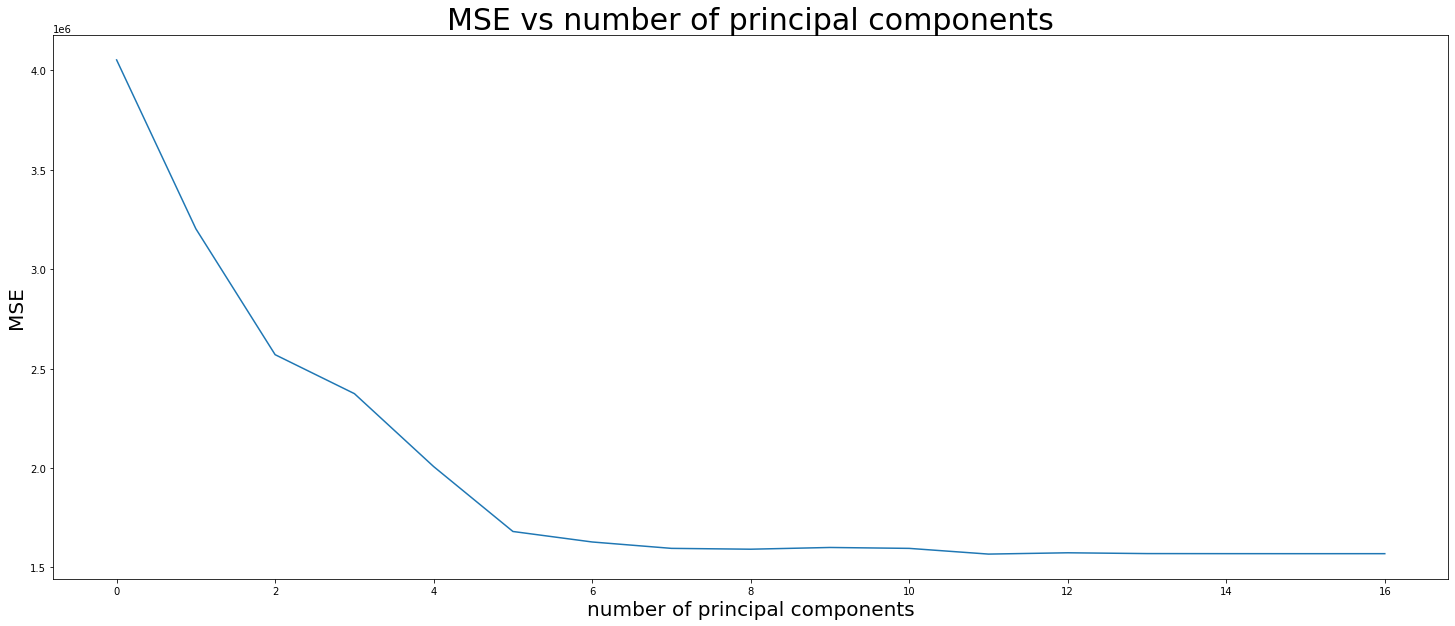

In [51]:
# plotting MSE for each component
# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(MSEdftrain)
plt.title('MSE vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('MSE', fontsize = 20)

In [52]:
# minimum MSE
MSEdftrain.min()

MSE    1.567104e+06
dtype: float64

Text(0, 0.5, 'explained variance ratio')

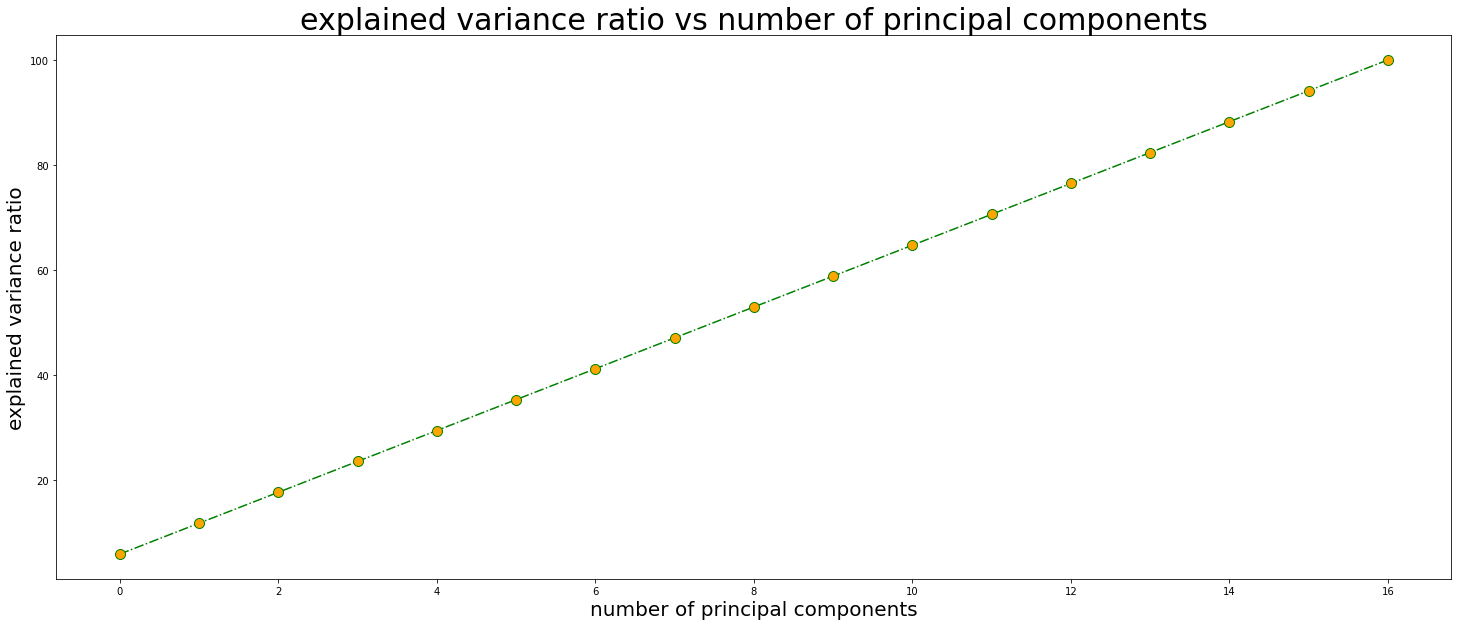

In [53]:
explained_variance_ratio_test = np.var(scale(X_train), axis=0) / np.sum(np.var(scale(X_train), axis=0)) # PLS does not have any method to automatically calculate explained variance ratio
EVR17 = pd.DataFrame(np.cumsum(np.round(explained_variance_ratio_test, decimals=4)*100), columns=['Explained Variance Ratio'])

# plt.xkcd()
plt.figure(figsize= (25, 10))
plt.plot(EVR17, color='green', linestyle ='-.', marker='o', markersize=10, markerfacecolor='orange')
plt.title('explained variance ratio vs number of principal components', fontsize = 30)
plt.xlabel('number of principal components', fontsize = 20)
plt.ylabel('explained variance ratio', fontsize = 20)

*The results suggest that I will get the best test MSE at M=11.*

In [54]:
plsfit11 = PLS(n_components = 11).fit(scale(X_train), y_train)
plspred11 = plsfit11.predict(scale(X_test))
plserror11 = mean_squared_error(y_test, plspred11)
plserror11

1341915.9204955264

**Partial least squares produces significantly lower test MSE than principal components regression.**

### 9(g) Comparing different models

In [55]:
pd.options.display.float_format = '{:,}'.format
error_list = pd.DataFrame([ols_mse, ridge_mse, lasso_mse, round(pcrerror17, 4), round(plserror11, 4)])
error_cols = pd.DataFrame(['linear regression', 'ridge regression', 'lasso regression', 'principal components regression', 'partial least squares'])
error_df = pd.concat([error_cols, error_list], axis=1)
error_df.columns = ['method', 'MSE']
error_df.sort_values('MSE')

,method,MSE
2,lasso regression,"902,138.2313"
1,ridge regression,"962,339.9226"
0,linear regression,"966,414.9739"
4,partial least squares,"1,341,915.9205"
3,principal components regression,"9,071,768.3724"


[Text(0, 0, '902138'),
 Text(0, 0, '962340'),
 Text(0, 0, '966415'),
 Text(0, 0, '1.34192e+06'),
 Text(0, 0, '9.07177e+06')]

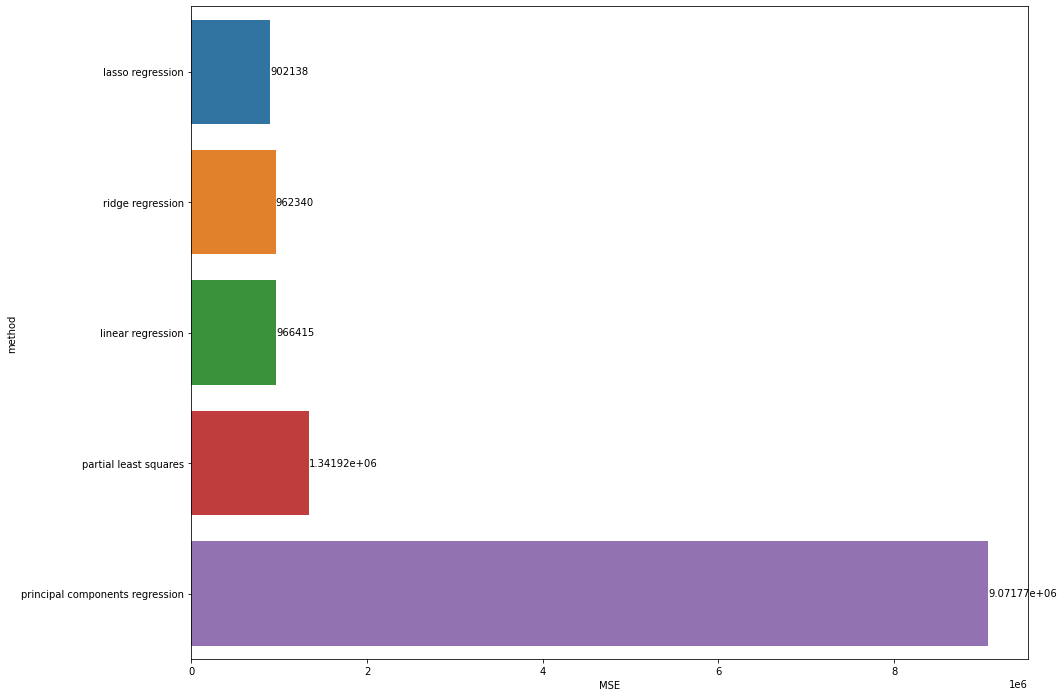

In [56]:
# plot final results by models
ax = sns.barplot(data = error_df, x = 'MSE', y = 'method', order = error_df.sort_values('MSE').method)
ax.bar_label(ax.containers[0])